<a href="https://colab.research.google.com/github/aRomans93/Curso-DS/blob/master/Aprendizaje_Supervisado1_(Alfonso_Roman)_checkpoint_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico de Aprendizaje Supervisado I

En este práctico aprenderemos cómo armar un pipeline de clasificación desde 0 con Scikit-Learn. Para ello aprenderemos creando un clasificador que aprenda a detectar cáncer de mama!

Antes de comenzar: este es un práctico evaluativo. Se evaluarán las implementaciones, comentarios del código y buenas prácticas de programación.

Bueno... manos a la obra!
---

Primero importamos las dependencias

In [0]:
from sklearn.svm import SVC # Support Vector Machine
from sklearn.linear_model import LogisticRegression # LogisticRegression
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from sklearn.datasets import load_breast_cancer, load_iris# Carga de datos
from sklearn.model_selection import GridSearchCV # Grid Search
from sklearn.decomposition import PCA # Para visualización
from mpl_toolkits.mplot3d import Axes3D # Para visualización

import math

import numpy as np # Cálculo numérico
import pandas as pd # Para visualización
import matplotlib.pyplot as plt # Para visualización


## Paso 1: procesar los datos

Lo primero que tenemos que hacer para comenzar con nuestro pipeline es cargar el dataset.

El dataset de Breast Cancer tiene dos clases, correspondientes al diagnóstico: (B)enigno o (M)aligno, por lo que es un problema de clasificación binaria. Cuenta con 569 entradas, cada una de 30 dimensiones que contienen las siguientes características: Radio (media de la distancia del centro a los puntos de los perímetros), Textura (desviación estandar en escala de grises), Perímetro, Area, etc.





Breast Cancer, tamaño: (569, 30)


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


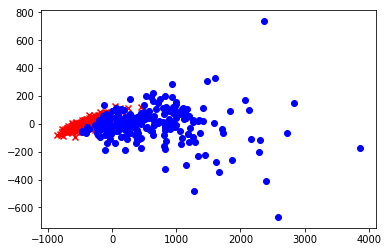

In [2]:
# Cargar el dataset, por un lado las features, por otro lado las anotaciones
Xdata, Ylabels = load_breast_cancer(return_X_y=True)

print("Breast Cancer, tamaño: {}".format(Xdata.shape))

fig = plt.figure()

# Plottear en 3D
# ax = fig.add_subplot(111, projection='3d')
# pca = PCA(n_components=3)
# proj = pca.fit_transform(Xdata)
# positive = proj[np.where(Ylabels == 1)]
# negative = proj[np.where(Ylabels == 0)]
# ax.scatter(positive[:,0], positive[:,1], positive[:,2], c='r', marker='x')
# ax.scatter(negative[:,0], negative[:,1], negative[:,2], c='b', marker='o')

# Plottear en 2D
ax = fig.add_subplot(111)
pca = PCA(n_components=2)
proj = pca.fit_transform(Xdata)
positive = proj[np.where(Ylabels == 1)]
negative = proj[np.where(Ylabels == 0)]
ax.scatter(positive[:,0], positive[:,1], c='r', marker='x')
ax.scatter(negative[:,0], negative[:,1], c='b', marker='o')


fig.show()

Nuestra tarea ahora es dividir el conjunto de datos en 3 partes: train, dev y test. Para ello, crearemos una función para poder separar el conjunto dados los porcentajes del dataset que queremos usar para cada uno.

In [0]:
def split_dataset(data, train=0.8, dev=0.1, test=0.1):
  """
  Función para separar el dataset en train, dev y test.
  
  Parametros
  ----------  
  data: una tupla (X,Y) donde X son los vectores de features e Y es el vector
        de las anotaciones
  train: porcentaje del dataset que será destinado para el conjunto de train
  dev: porcentaje del dataset que será destinado para el conjunto de dev
  test: porcentaje del dataset que será destinado para el conjunto de test
  
  Retorna
  -------
  out: una tupla (train_set, dev_set, test_set) donde cada uno es una tupla
       (X, Y).
  """
  np.random.seed(0) # Para poder reproducir resultados
  assert(len(data[0]) == len(data[1]))
  train_set, dev_set, test_set = [], [], []

  m = len(data[0]) # Tamaño del dataset
  
  # COMPLETAR
  # Pista: np.random.permutation permuta aleatoriamente un arreglo
  indice1 = round(train*m)
  indice2 = indice1 + round(dev*m)
  indices_permutation = np.split(np.random.permutation(np.arange(m)), [indice1, indice2, m])
  train_set = (data[0][list(indices_permutation[0])], data[1][list(indices_permutation[0])])
  dev_set = (data[0][list(indices_permutation[1])], data[1][list(indices_permutation[1])])
  test_set = (data[0][list(indices_permutation[2])], data[1][list(indices_permutation[2])])
  
  # COMPLETAR
  
  return (train_set, dev_set, test_set)

In [0]:
train_set, dev_set, test_set = split_dataset((Xdata, Ylabels))

print("Tamaño de las particiones:")
print("Train: {}".format(len(train_set[0])))
print("Dev: {}".format(len(dev_set[0])))
print("Test: {}".format(len(test_set[0])))

assert((len(train_set[0]) + len(dev_set[0]) + len(test_set[0])) == len(Xdata))

Tamaño de las particiones:
Train: 455
Dev: 56
Test: 58


## Paso 2: Elegir nuestro Clasificador

En este segundo paso, vamos a elegir el clasificador que queremos usar.

Scikit-Learn hace muy fácil instanciar y entrenar clasificadores. Todos los clasificadores cuentan con:



*   Una clase para instanciar el clasificador. En este momento se toman todas las decisiones de hiperparámetros.
*   Un método .fit(X,Y) que dados datos X y anotaciones Y, entrena el clasificador.

En este práctico usaremos [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).


In [0]:
# Usamos Support Vector Machines
clf = SVC(C=1, kernel='rbf')

clf

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

## Paso 3: Entrenar

Una vez elegido nuestro clasificador, vamos a entrenar.

Todos las clases de clasificadores de Scikit-Learn tienen un método ".fit" con el cual se entrenan.

In [0]:
Xtrain, Ytrain = train_set

# COMPLETAR
clf.fit(Xtrain, Ytrain)
# COMPLETAR

C:\Users\alfonso.roman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
# Para usar predict, los datos deben tener shape (1, n)
# donde n es la cantidad de features de los datos
dr = (1, Xdata.shape[1])

clf.predict(np.reshape(Xdata[0], dr))

array([1])

Scikit-Learn devuelve un numpy.array con la clase predicha por el clasificador.

Con esto, ya podemos medir performance.

## Paso 4: Definir y reportar métricas

Para poder dar una medida cuantitativa de la performance de nuestro clasificador, nos basamos en métricas automáticas.

En este práctico vamos a reportar Accuracy. Accuracy está definida como:




> `Accuracy = (TP + TN) / (TP+TN+FP+FN)`

donde TP = True positive (ejemplos correctamente reportados como positivos), FP = False positive (ejemplos erroneamente reportados como positivos), TN = True negative (ejemplos correctamente reportados como negativos) y FN = False negative (ejemplos erroneamente reportados como negativos).

En nuestro caso, dado nuestro dataset, consideraremos la clase 0 como "maligno" y 1 como "benigno". Nuestra clase negativa será la clase 0 y la positiva la clase 1.




In [0]:
def accuracy(predictions, true_labels):
  """
  Calcula la accuracy basada en las predicciones.
  
  Parametros
  ----------  
  predictions: numpy.array de predicciones donde cada una es 0 o 1
  
  true_labels: numpy.array de anotaciones de la verdadera clase de cada ejemplo
               clasificado
  
  Retorna
  -------
  out: float que representa la accurary en la clasificación.
  """
  # COMPLETAR
  m = len(predictions) # Tamaño del arreglo
  predictions_positive = np.sum(predictions) # Número de predicciones positivas
  predictions_negative = m - predictions_positive # Número de predicciones negativas
  tp = np.sum(predictions*true_labels) # Verdaderos positivos
  tn = m - np.count_nonzero(predictions+true_labels) # Verdaderos negativos
  fp = predictions_positive - tp # Falsos positivos
  fn = predictions_negative - tn # Falsos negativos
  # COMPLETAR
  
  return float(tp+tn) / (tp+tn+fp+fn)

In [0]:
def predict(data, clf):
  """
  Predice los valores en data con el clasificador clf.
  
  Parametros
  ----------  
  data: numpy.array de valores a predecir
  
  clf: clasificador instanciado con scikit-learn
  
  Retorna
  -------
  out: numpy.array con las predicciones para cada ejemplo
  """
  # COMPLETAR
  dr = (1, data.shape[1])
  predictions = []
    
  for i in range(len(data)):
    predictions.append(int(clf.predict(np.reshape(data[i], dr))))
  # COMPLETAR
  
  return np.array(predictions)

In [0]:
Xtest, Ytest = test_set

pred_train = predict(Xtrain, clf)
pred_test  = predict(Xtest, clf)

print("Accuracy del modelo en train: {}".format(accuracy(pred_train, Ytrain)))
print("Accuracy del modelo en test: {}".format(accuracy(pred_test, Ytest)))
  

287 168 0 0
Accuracy del modelo en train: 1.0
33 0 25 0
Accuracy del modelo en test: 0.5689655172413793


##### Resultado Esperado

<table>
<tr>
    <td> 
    Accuracy del modelo en train:
    </td>
    <td> 
    1.0
    </td>
</tr>

<tr>
    <td> 
    Accuracy del modelo en test:
    </td>
    <td> 
    0.5535714285714286
    </td>
    </td>
</tr>

## Interpretación de Resultados

Viendo los resultados podemos notar algo: tenemos la accuracy máxima en el conjunto de train y una accuracy baja en el conjunto de test.

Este es un clásico caso de ***Overfitting***.

**Ejercicio:** A qué se debe esto?





___
Respuesta de \<Nombre>:
---

\<Completar>
___

# Pipeline extendido

Ahora implementaremos el pipeline completo, con el ajuste de hiperparámetros.

Para eso veamos los hiperparámetros de SVC:



*   C: Término de penalidad para la función de pérdida (default=1.0)
*   kernel: Especifica la función de kernel a ser usada por el algoritmo (default='rbf')
    otras opciones son: 'linear', 'poly', 'rbf', 'sigmoid', 'precompute' o una función llamable.
    
    
Vamos a buscar cuál es la mejor configuración de valor de C y kernel. Probaremos, con fines de simplicidad, con kernels 'linear', 'poly' y 'rbf'.

Para eso emplearemos [Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).


In [0]:
np.random.seed(0) # Para poder reproducir resultados

# Instanciamos un nuevo clasificador
svc = SVC()

hparams = {'kernel':('linear', 'rbf'), 'C':[1,3]}

clf = GridSearchCV(svc, hparams)

clf.fit(Xtrain, Ytrain)


In [0]:
# Seleccionar el mejor clasificador
best_clf = clf.best_estimator_

# Mostrar resultados de la Cross Validation
pd.DataFrame(clf.cv_results_)

In [0]:
pred_best = predict(Xtest, best_clf)

print(pred_best)
print("Accuracy del modelo en test: {}".format(accuracy(pred_test, Ytest)))



# Ahora es su turno:

Hagan su propio pipeline para clasificación y reporten resultados. Dado que Scikit-Learn maneja la validación con GridSearchCV, vamos a separar el conjunto Xdata en train y test con las siguientes proporciones



*   train: 85%
*   test: 15%

Se pide:


1.   Separar el dataset.
2.   Entrenar el nuevo modelo.
3.   Reportar los parámetros del modelo.
4.   Reportar accuracy en conjunto de train y de test.

No se evaluará performance del modelo, sino la legibilidad del código, **los comentarios** del mismo y las buenas prácticas de programación.

In [0]:
np.random.seed(0)

train_set, _, test_set = [], [], [] # COMPLETAR
assert((len(train_data) + len(test_data)) == len(Xdata))

# TU PIPELINE VIENE AQUI
# NO SE OLVIDEN DE LOS COMENTARIOS